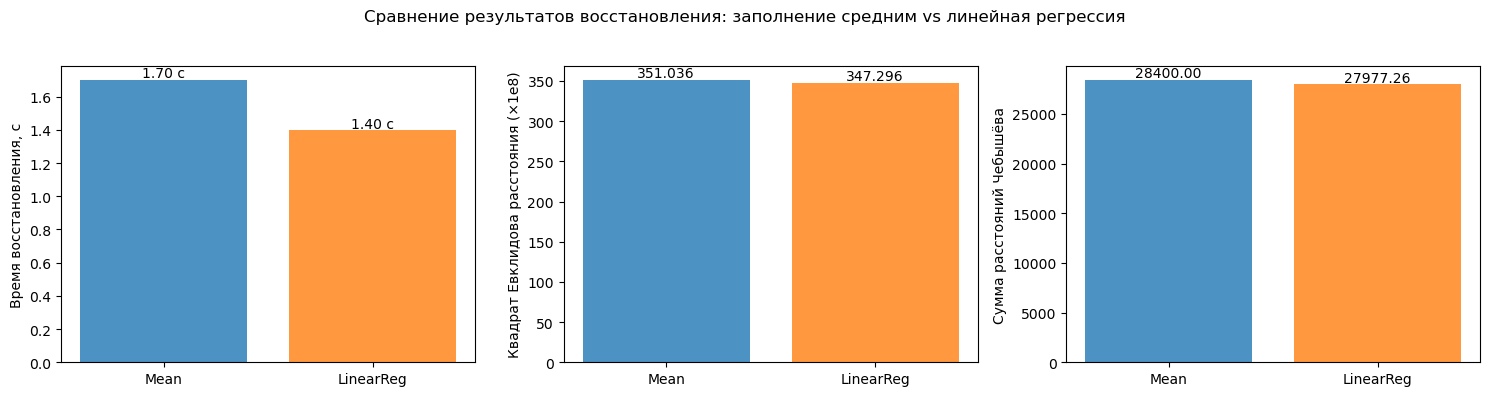

LinearReg vs Mean:
- Время: 1.70 с -> 1.40 с (17.6% быстрее)
- Квадрат Евклидова расстояния: 3.510361e+10 -> 3.472961e+10 (1.07% улучшение)
- Сумма расстояний Чебышёва: 28400.00 -> 27977.26 (1.49% улучшение)


In [22]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_imputation_results(results):
    """
    results: dict like
    {
      'Mean': {'time': 1.7, 'euclidean_sq': 351.0361e8, 'chebyshev': 28400},
      'LinearReg': {'time': 1.4, 'euclidean_sq': 347.2961e8, 'chebyshev': 27977.26}
    }
    """
    methods = list(results.keys())
    times = np.array([results[m]['time'] for m in methods])
    eucl = np.array([results[m]['euclidean_sq'] for m in methods])
    cheb = np.array([results[m]['chebyshev'] for m in methods])

    x = np.arange(len(methods))
    colors = ['C0', 'C1', 'C2']

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # Time
    axes[0].bar(x, times, color=colors[:len(methods)], alpha=0.8)
    axes[0].set_xticks(x); axes[0].set_xticklabels(methods)
    axes[0].set_ylabel('Время восстановления, с')
    for i, v in enumerate(times):
        axes[0].text(i, v * 1.01, f"{v:.2f} с", ha='center')

    # Euclidean (scale for readability)
    scale = 1e8
    axes[1].bar(x, eucl / scale, color=colors[:len(methods)], alpha=0.8)
    axes[1].set_xticks(x); axes[1].set_xticklabels(methods)
    axes[1].set_ylabel(f'Квадрат Евклидова расстояния (×1e{int(np.log10(scale))})')
    for i, v in enumerate(eucl / scale):
        axes[1].text(i, v * 1.01, f"{v:.3f}", ha='center')

    # Chebyshev
    axes[2].bar(x, cheb, color=colors[:len(methods)], alpha=0.8)
    axes[2].set_xticks(x); axes[2].set_xticklabels(methods)
    axes[2].set_ylabel('Сумма расстояний Чебышёва')
    for i, v in enumerate(cheb):
        axes[2].text(i, v * 1.01, f"{v:.2f}", ha='center')

    fig.suptitle('Сравнение результатов восстановления: заполнение средним vs линейная регрессия')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # Печатный краткий вывод с процентными изменениями (считаем первый метод базовым)
    base, other = methods[0], methods[1]
    time_diff_pct = (results[base]['time'] - results[other]['time']) / results[base]['time'] * 100
    eucl_diff_pct = (results[base]['euclidean_sq'] - results[other]['euclidean_sq']) / results[base]['euclidean_sq'] * 100
    cheb_diff_pct = (results[base]['chebyshev'] - results[other]['chebyshev']) / results[base]['chebyshev'] * 100

    print(f"{other} vs {base}:")
    print(f"- Время: {results[base]['time']:.2f} с -> {results[other]['time']:.2f} с ({time_diff_pct:.1f}% быстрее)")
    print(f"- Квадрат Евклидова расстояния: {results[base]['euclidean_sq']:.6e} -> {results[other]['euclidean_sq']:.6e} ({eucl_diff_pct:.2f}% улучшение)")
    print(f"- Сумма расстояний Чебышёва: {results[base]['chebyshev']:.2f} -> {results[other]['chebyshev']:.2f} ({cheb_diff_pct:.2f}% улучшение)")

# Пример использования с вашими данными
results = {
    'Mean': {'time': 1.7, 'euclidean_sq': 351.0361e8, 'chebyshev': 28400},
    'LinearReg': {'time': 1.4, 'euclidean_sq': 347.2961e8, 'chebyshev': 27977.26}
}

visualize_imputation_results(results)

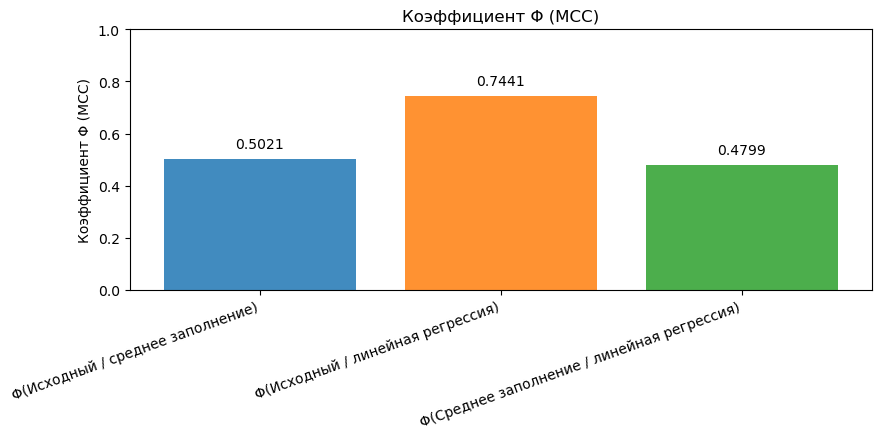

1
Лучший результат: Φ(Исходный / линейная регрессия) = 0.7441


In [25]:
# Визуализация итоговых значений коэффициента Фи (MCC)
phi_names = [
    "Φ(Исходный / среднее заполнение)",
    "Φ(Исходный / линейная регрессия)",
    "Φ(Среднее заполнение / линейная регрессия)"
]
phi_vals = [0.5021, 0.7441, 0.4799]

x = np.arange(len(phi_names))
colors = ['C0', 'C1', 'C2']

fig, ax = plt.subplots(figsize=(9, 4.5))
bars = ax.bar(x, phi_vals, color=colors, alpha=0.85)
ax.set_xticks(x)
ax.set_xticklabels(phi_names, rotation=20, ha='right')
ax.set_ylim(0, 1)
ax.set_ylabel("Коэффициент Φ (MCC)")
ax.set_title("Коэффициент Φ (MCC)")

for i, v in enumerate(phi_vals):
    ax.text(i, v + 0.03, f"{v:.4f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(1)
# Краткое текстовое резюме
best_idx = int(np.argmax(phi_vals))
print(f"Лучший результат: {phi_names[best_idx]} = {phi_vals[best_idx]:.4f}")

In [ ]:
matrix_1 = [
    [3.25237122, 3.09561413, 0.58248028, 2.57566119, 5.25416093, 3.64918994],
    [2.57138993, 1.93856516, 2.70845615, 0.15413717, 4.64469335, 3.16430666],
    [1.93782493, 2.56300496, 3.48615267, 3.26012807, 5.10987874, 0.08630565],
    [3.27284782, 0.08070058, 3.34471511, 1.92755469, 5.09812019, 2.57429785],
    [0.09661223, 3.28389404, 2.95293714, 2.72084301, 4.70152339, 1.93638049],
    [4.55866118, 4.99365369, 5.05865674, 4.58236112, 0.13460893, 5.00588092]
]

matrix_2 = [
    [3.16154661, 2.52222709, 0.73376089, 3.06504775, 3.62739146, 5.1161515],
    [2.48869685, 0.11693546, 2.81221146, 1.93838228, 3.18188571, 4.63114296],
    [1.93565077, 3.24197504, 3.33175525, 2.61942409, 0.04920842, 5.12726647],
    [3.2068069,  1.9324669,  3.3318099,  0.06631702, 2.59545231, 5.08512423],
    [0.11746769, 2.69347564, 2.88414909, 3.32868446, 1.93541856, 4.72138694],
    [4.53359398, 4.53487215, 5.09004694, 5.00695869, 5.02996677, 0.22737489]
]



def analyze_matrix(matrix, method_name):
    print(f"\n=== Анализ {method_name} ===")
    
    # Анализ диагонали
    diagonal = [matrix[i][i] for i in range(6)]
    print("Диагональные элементы:", [f"{x:.3f}" for x in diagonal])
    
    # Поиск минимальных расстояний
    min_distances = []
    correspondences = []
    
    for i in range(6):
        min_dist = min(matrix[i])
        min_idx = matrix[i].index(min_dist)
        min_distances.append(min_dist)
        correspondences.append((i, min_idx, min_dist))
        
        quality = "ОТЛИЧНО" if min_dist < 0.1 else "ХОРОШО" if min_dist < 0.3 else "УМЕРЕННО" if min_dist < 0.7 else "ПЛОХО"
        print(f"Кластер {i} → Кластер {min_idx}: расстояние {min_dist:.3f} - {quality}")
    
    # Метрики
    avg_min_distance = sum(min_distances) / len(min_distances)
    good_matches = sum(1 for dist in min_distances if dist < 0.5)
    match_percentage = good_matches / len(min_distances) * 100
    
    print(f"\nМЕТРИКИ СТАБИЛЬНОСТИ:")
    print(f"Среднее минимальное расстояние: {avg_min_distance:.3f}")
    print(f"Процент хороших соответствий (<0.5): {match_percentage:.1f}%")
    print(f"Количество хороших соответствий: {good_matches}/6")
    
    return {
        'avg_min_distance': avg_min_distance,
        'match_percentage': match_percentage,
        'good_matches': good_matches,
        'min_distances': min_distances,
        'correspondences': correspondences
    }

# Анализ обеих матриц
results_1 = analyze_matrix(matrix_1, "original vs mean-impute")
results_2 = analyze_matrix(matrix_2, "original vs lin-reg-impute")


=== Анализ original vs mean-impute ===
Диагональные элементы: ['3.252', '1.939', '3.486', '1.928', '4.702', '5.006']
Кластер 0 → Кластер 2: расстояние 0.582 - УМЕРЕННО
Кластер 1 → Кластер 3: расстояние 0.154 - ХОРОШО
Кластер 2 → Кластер 5: расстояние 0.086 - ОТЛИЧНО
Кластер 3 → Кластер 1: расстояние 0.081 - ОТЛИЧНО
Кластер 4 → Кластер 0: расстояние 0.097 - ОТЛИЧНО
Кластер 5 → Кластер 4: расстояние 0.135 - ХОРОШО

МЕТРИКИ СТАБИЛЬНОСТИ:
Среднее минимальное расстояние: 0.189
Процент хороших соответствий (<0.5): 83.3%
Количество хороших соответствий: 5/6

=== Анализ original vs lin-reg-impute ===
Диагональные элементы: ['3.162', '0.117', '3.332', '0.066', '1.935', '0.227']
Кластер 0 → Кластер 2: расстояние 0.734 - ПЛОХО
Кластер 1 → Кластер 1: расстояние 0.117 - ХОРОШО
Кластер 2 → Кластер 4: расстояние 0.049 - ОТЛИЧНО
Кластер 3 → Кластер 3: расстояние 0.066 - ОТЛИЧНО
Кластер 4 → Кластер 0: расстояние 0.117 - ХОРОШО
Кластер 5 → Кластер 5: расстояние 0.227 - ХОРОШО

МЕТРИКИ СТАБИЛЬНОСТИ:
Сре